In [1]:
from dataloader import open_dataset
import matplotlib.pyplot as plt
import datetime as dt
import cartopy
import cartopy.crs as ccrs
import numpy as np
import cmocean
#%matplotlib ipympl
%load_ext autoreload
%autoreload 2

In [2]:
inference = '/lustre/storeB/project/fou/hi/foccus/experiments/ngpus-2017-24/inference/lam-48h.nc'
inf = open_dataset(inference, var='temperature_0', region='oslofjorden', time=0).dataset
inf_time = inf.time.values
valid_time = dt.datetime.strptime(str(inf_time)[0:10], '%Y-%m-%d')

truth = f'/lustre/storeB/project/fou/hi/foccus/datasets/symlinks/norkystv3-hindcast/{valid_time.year}/norkyst800-{valid_time.year}{valid_time.month:02d}{valid_time.day:02d}.nc'
truth = open_dataset(truth, var='temperature', region='oslofjorden', time=str(inf_time), depth=-1).dataset
print(truth.time.values)
print(inf.time.values)

2024-04-02T00:00:00.000000000
2024-04-02T00:00:00.000000000


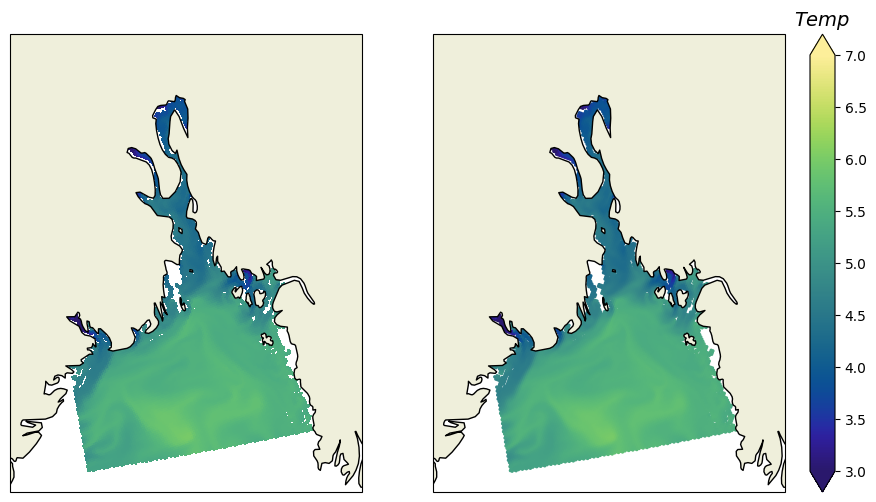

In [3]:
fig, ax = plt.subplots(1,2, figsize=(10,10), subplot_kw={'projection': ccrs.NorthPolarStereo()})
im = ax[0].pcolormesh(truth.lon, truth.lat, truth.temperature, transform=ccrs.PlateCarree(), cmap=cmocean.cm.haline, vmin=3, vmax=7)
ax[1].scatter(inf.longitude, inf.latitude, c=inf.temperature_0, s=2, transform=ccrs.PlateCarree(), cmap=cmocean.cm.haline, vmin=3, vmax=7)
extent = ax[1].get_extent()
ax[0].set_extent(extent, crs=ccrs.NorthPolarStereo())
cax = fig.add_axes([ax[1].get_position().x1+0.025, ax[1].get_position().y0, 0.025, ax[1].get_position().height])
cbar = fig.colorbar(im, ax=ax[1], cax=cax, extend='both')
cbar.ax.set_title('$Temp$', fontsize=14)
temp = np.array(truth.temperature.values).flatten()
#ax[2].scatter(inf.longitude, inf.latitude, c=inf.temperature_0-temp, transform=ccrs.PlateCarree())
for i in range(2):
    ax[i].add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
    

### Have to do some masking to get the arrays on the same shape for difference. Might be an issue with the dataloader

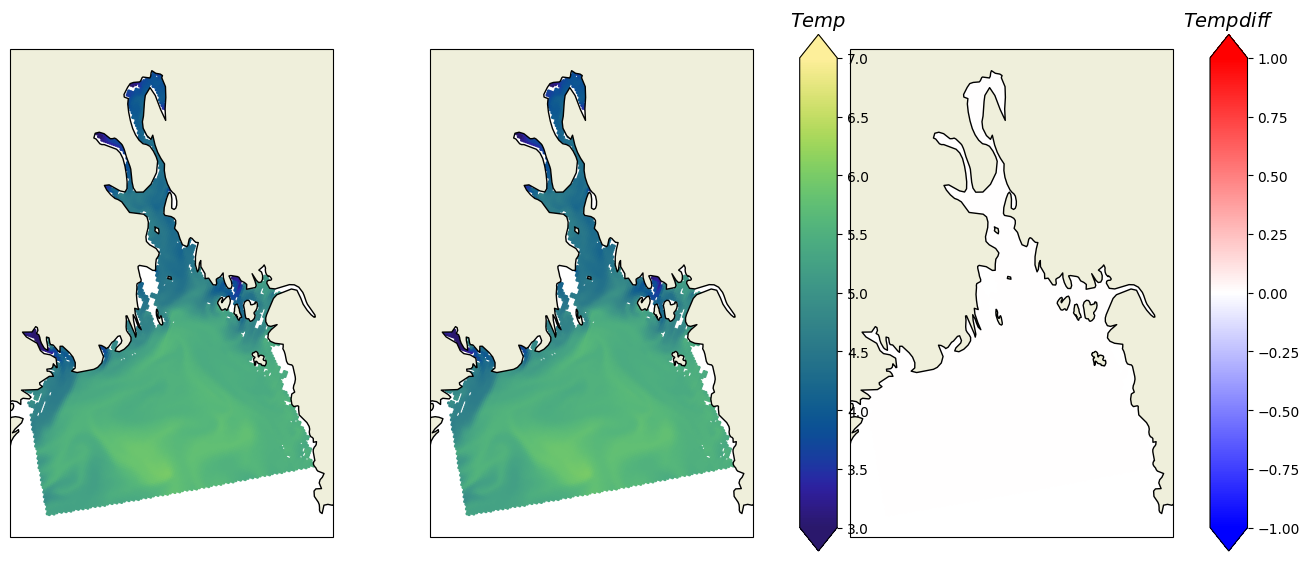

In [4]:
temp = np.array(truth.temperature.values).flatten()
temp_0 = np.array(inf.temperature_0)
mask = np.where(~np.isnan(inf.temperature_0))

mask2 = np.where(~np.isnan(temp))
temp = temp[mask2]
temp_0 = temp_0[mask]
lon = np.array(inf.longitude)[mask]
lat = np.array(inf.latitude)[mask]
tlon = np.array(truth.lon).flatten()[mask2]
tlat = np.array(truth.lat).flatten()[mask2]


fig, ax = plt.subplots(1,3, figsize=(15,10), subplot_kw={'projection': ccrs.NorthPolarStereo()})
im = ax[0].scatter(tlon, tlat, c=temp, s=2, transform=ccrs.PlateCarree(), cmap=cmocean.cm.haline, vmin=3, vmax=7)
ax[1].scatter(lon, lat, c=temp_0, s=2, transform=ccrs.PlateCarree(), cmap=cmocean.cm.haline, vmin=3, vmax=7)
im2 = ax[2].scatter(lon, lat, c=temp_0-temp, s=2, transform=ccrs.PlateCarree(), cmap='bwr', vmin=-1, vmax=1)
extent = ax[1].get_extent()
ax[0].set_extent(extent, crs=ccrs.NorthPolarStereo())
cax = fig.add_axes([ax[1].get_position().x1+0.025, ax[1].get_position().y0, 0.025, ax[1].get_position().height])
cbar = fig.colorbar(im, ax=ax[1], cax=cax, extend='both')
cbar.ax.set_title('$Temp$', fontsize=14)
cax = fig.add_axes([ax[2].get_position().x1+0.025, ax[2].get_position().y0, 0.025, ax[2].get_position().height])
cbar = fig.colorbar(im2, ax=ax[2], cax=cax, extend='both')
cbar.ax.set_title('$Temp diff$', fontsize=14)
temp = np.array(truth.temperature.values).flatten()
plt.subplots_adjust(wspace=0.3)

for i in range(3):
    ax[i].add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')

2024-04-02T00:00:00.000000000
2024-04-02T00:00:00.000000000
2024-04-02T09:00:00.000000000
2024-04-02T09:00:00.000000000
2024-04-02T18:00:00.000000000
2024-04-02T18:00:00.000000000
2024-04-03T06:00:00.000000000
2024-04-03T06:00:00.000000000
2024-04-04T00:00:00.000000000
2024-04-04T00:00:00.000000000


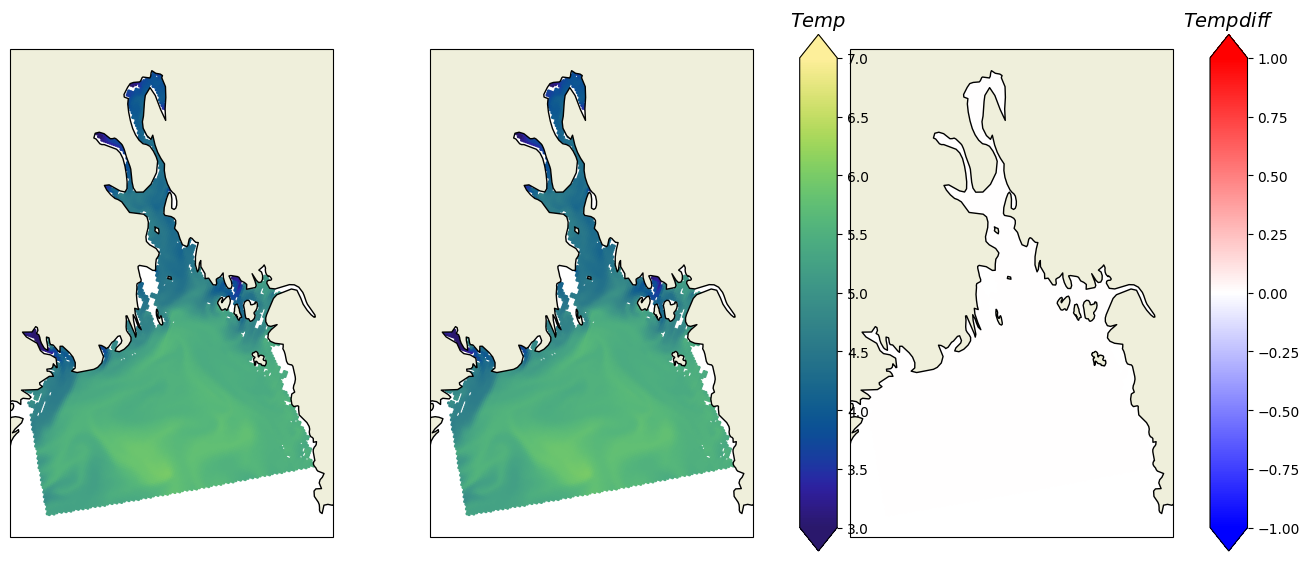

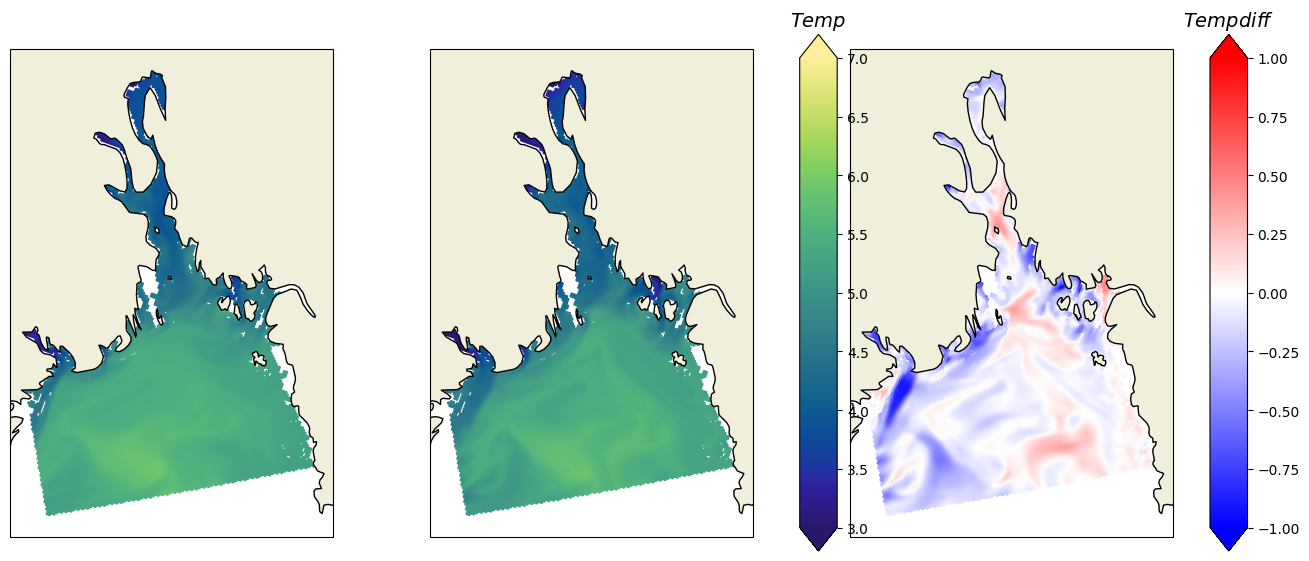

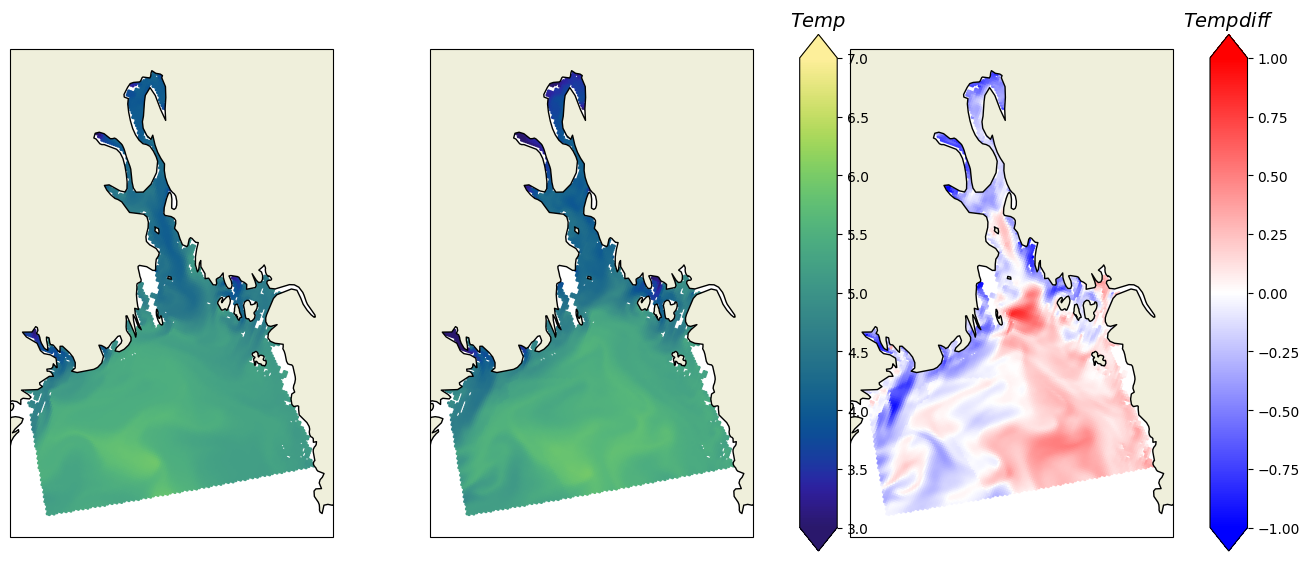

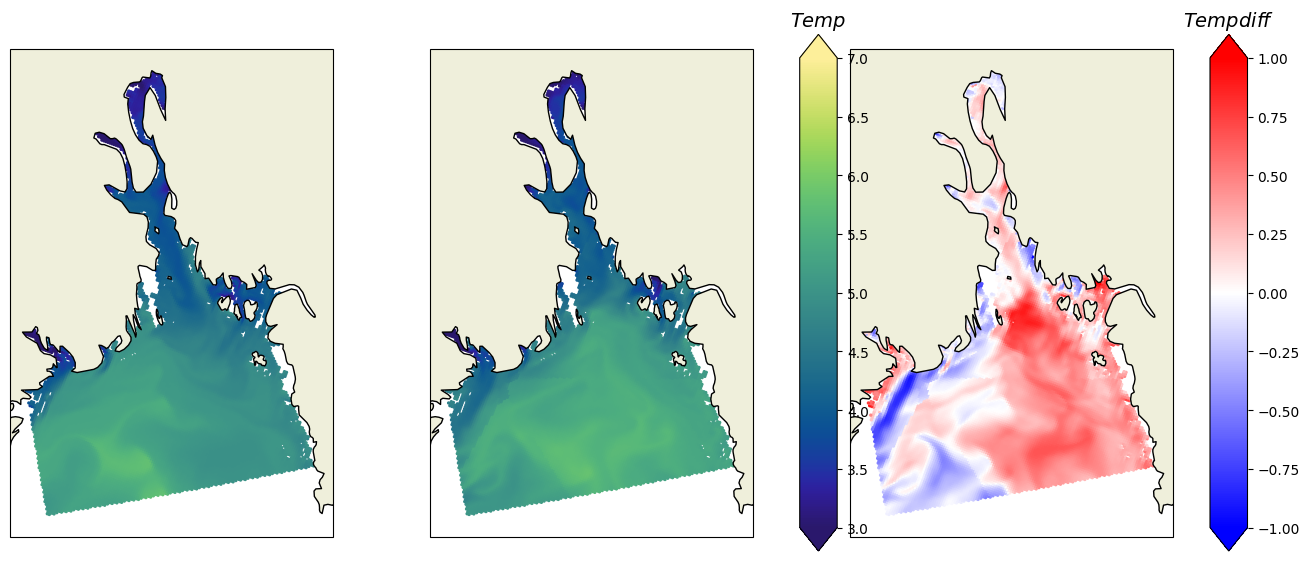

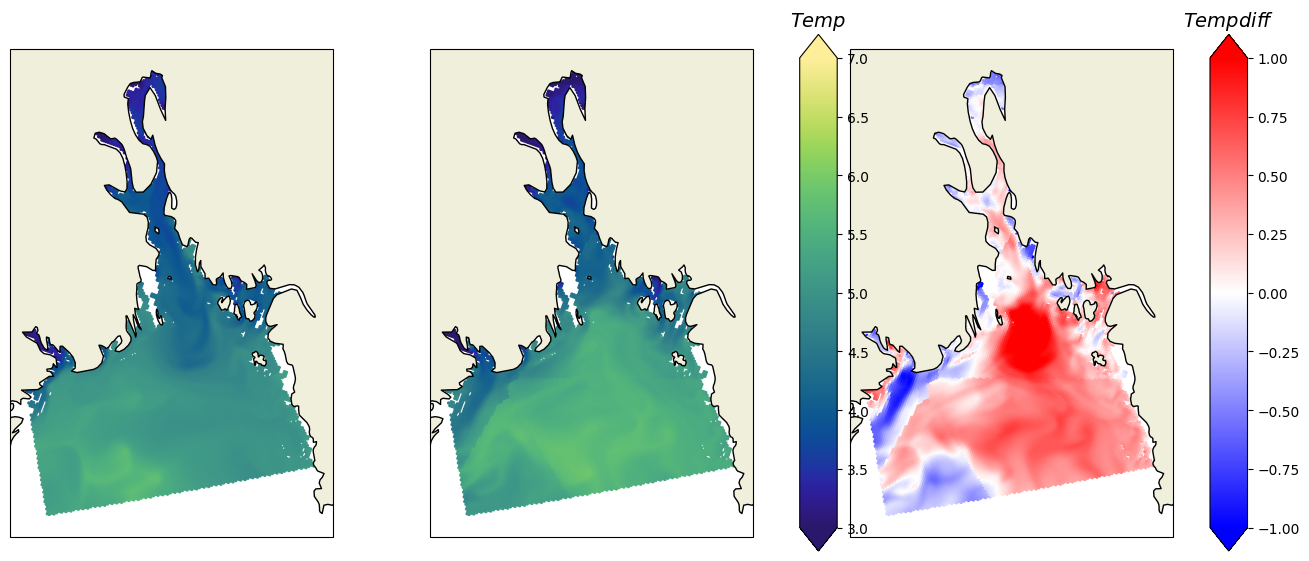

In [5]:
for h in [0,3,6, 10, 16]:
    inference = '/lustre/storeB/project/fou/hi/foccus/experiments/ngpus-2017-24/inference/lam-48h.nc'
    inf = open_dataset(inference, var='temperature_0', region='oslofjorden', time=h).dataset
    inf_time = inf.time.values
    valid_time = dt.datetime.strptime(str(inf_time)[0:10], '%Y-%m-%d')

    truth = f'/lustre/storeB/project/fou/hi/foccus/datasets/symlinks/norkystv3-hindcast/{valid_time.year}/norkyst800-{valid_time.year}{valid_time.month:02d}{valid_time.day:02d}.nc'
    truth = open_dataset(truth, var='temperature', region='oslofjorden', time=str(inf_time), depth=-1).dataset
    print(truth.time.values)
    print(inf.time.values)

    temp = np.array(truth.temperature.values).flatten()
    temp_0 = np.array(inf.temperature_0)
    mask = np.where(~np.isnan(inf.temperature_0))

    mask2 = np.where(~np.isnan(temp))
    temp = temp[mask2]
    temp_0 = temp_0[mask]
    lon = np.array(inf.longitude)[mask]
    lat = np.array(inf.latitude)[mask]
    tlon = np.array(truth.lon).flatten()[mask2]
    tlat = np.array(truth.lat).flatten()[mask2]


    fig, ax = plt.subplots(1,3, figsize=(15,10), subplot_kw={'projection': ccrs.NorthPolarStereo()})
    im = ax[0].scatter(tlon, tlat, c=temp, s=2, transform=ccrs.PlateCarree(), cmap=cmocean.cm.haline, vmin=3, vmax=7)
    ax[1].scatter(lon, lat, c=temp_0, s=2, transform=ccrs.PlateCarree(), cmap=cmocean.cm.haline, vmin=3, vmax=7)
    im2 = ax[2].scatter(lon, lat, c=temp_0-temp, s=2, transform=ccrs.PlateCarree(), cmap='bwr', vmin=-1, vmax=1)
    extent = ax[1].get_extent()
    ax[0].set_extent(extent, crs=ccrs.NorthPolarStereo())
    cax = fig.add_axes([ax[1].get_position().x1+0.025, ax[1].get_position().y0, 0.025, ax[1].get_position().height])
    cbar = fig.colorbar(im, ax=ax[1], cax=cax, extend='both')
    cbar.ax.set_title('$Temp$', fontsize=14)
    cax = fig.add_axes([ax[2].get_position().x1+0.025, ax[2].get_position().y0, 0.025, ax[2].get_position().height])
    cbar = fig.colorbar(im2, ax=ax[2], cax=cax, extend='both')
    cbar.ax.set_title('$Temp diff$', fontsize=14)
    temp = np.array(truth.temperature.values).flatten()
    plt.subplots_adjust(wspace=0.3)

    for i in range(3):
        ax[i].add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')

2024-04-02T00:00:00.000000000
2024-04-02T00:00:00.000000000
2024-04-02T09:00:00.000000000
2024-04-02T09:00:00.000000000
2024-04-02T18:00:00.000000000
2024-04-02T18:00:00.000000000
2024-04-03T06:00:00.000000000
2024-04-03T06:00:00.000000000
2024-04-04T00:00:00.000000000
2024-04-04T00:00:00.000000000


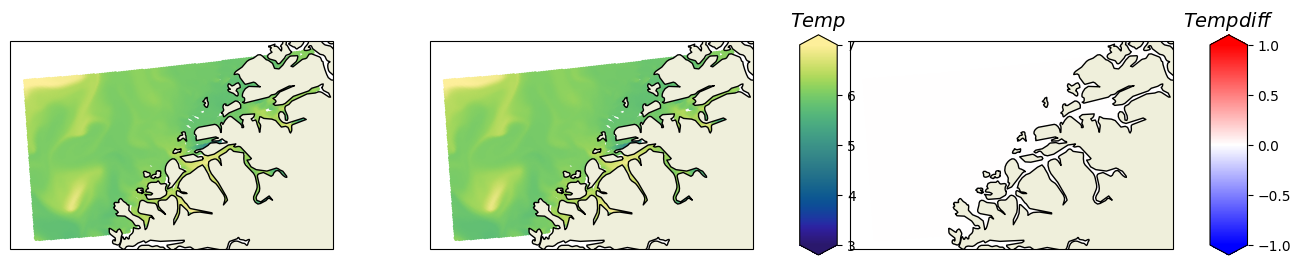

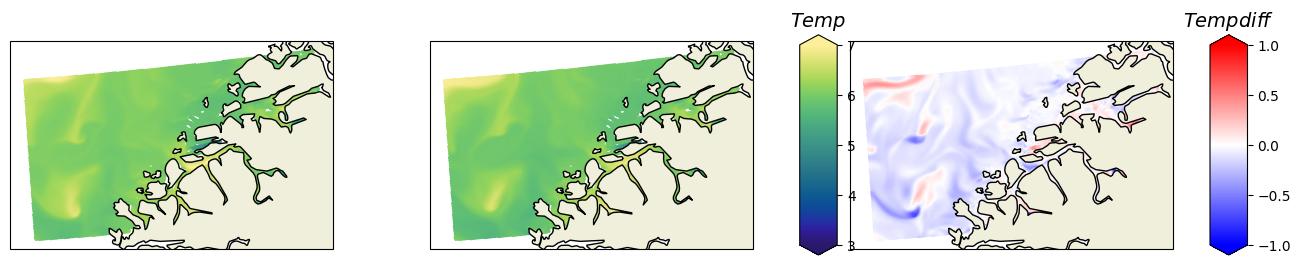

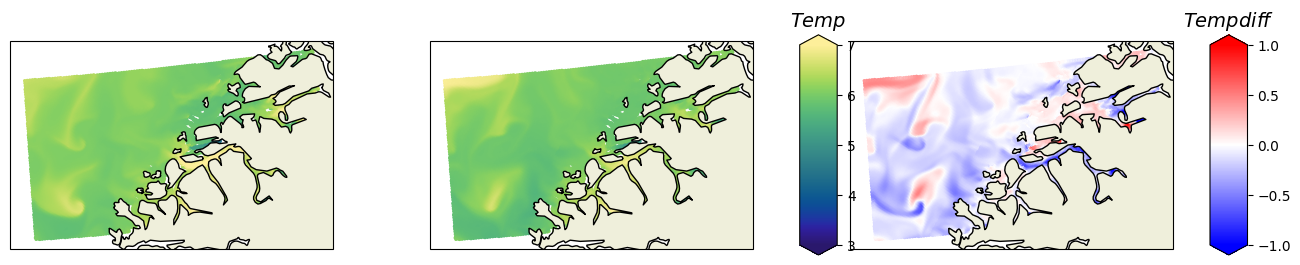

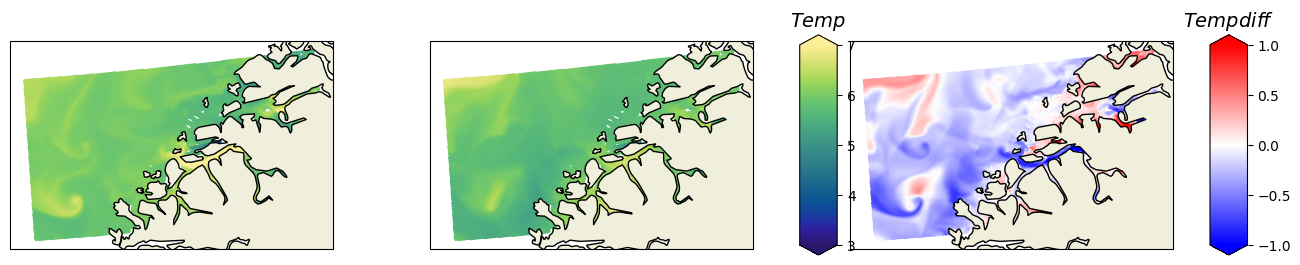

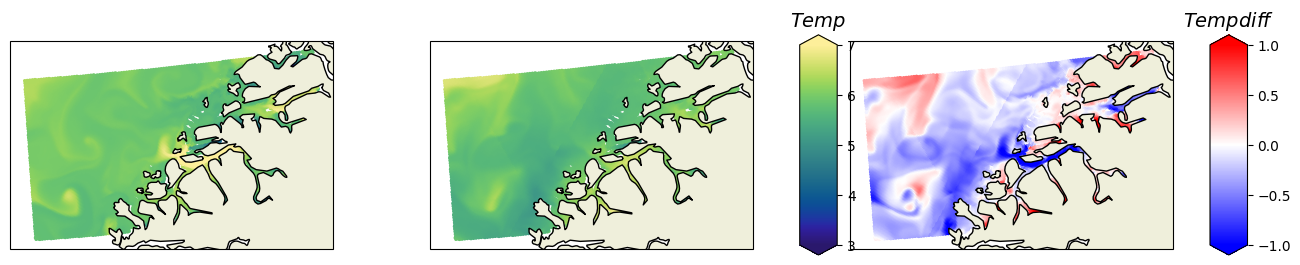

In [6]:
for h in [0,3,6, 10, 16]:
    inference = '/lustre/storeB/project/fou/hi/foccus/experiments/ngpus-2017-24/inference/lam-48h.nc'
    inf = open_dataset(inference, var='temperature_0', region='sulafjorden', time=h).dataset
    inf_time = inf.time.values
    valid_time = dt.datetime.strptime(str(inf_time)[0:10], '%Y-%m-%d')

    truth = f'/lustre/storeB/project/fou/hi/foccus/datasets/symlinks/norkystv3-hindcast/{valid_time.year}/norkyst800-{valid_time.year}{valid_time.month:02d}{valid_time.day:02d}.nc'
    truth = open_dataset(truth, var='temperature', region='sulafjorden', time=str(inf_time), depth=-1).dataset
    print(truth.time.values)
    print(inf.time.values)

    temp = np.array(truth.temperature.values).flatten()
    temp_0 = np.array(inf.temperature_0)
    mask = np.where(~np.isnan(inf.temperature_0))

    mask2 = np.where(~np.isnan(temp))
    temp = temp[mask2]
    temp_0 = temp_0[mask]
    lon = np.array(inf.longitude)[mask]
    lat = np.array(inf.latitude)[mask]
    tlon = np.array(truth.lon).flatten()[mask2]
    tlat = np.array(truth.lat).flatten()[mask2]


    fig, ax = plt.subplots(1,3, figsize=(15,10), subplot_kw={'projection': ccrs.NorthPolarStereo()})
    im = ax[0].scatter(tlon, tlat, c=temp, s=2, transform=ccrs.PlateCarree(), cmap=cmocean.cm.haline, vmin=3, vmax=7)
    ax[1].scatter(lon, lat, c=temp_0, s=2, transform=ccrs.PlateCarree(), cmap=cmocean.cm.haline, vmin=3, vmax=7)
    im2 = ax[2].scatter(lon, lat, c=temp_0-temp, s=2, transform=ccrs.PlateCarree(), cmap='bwr', vmin=-1, vmax=1)
    extent = ax[1].get_extent()
    ax[0].set_extent(extent, crs=ccrs.NorthPolarStereo())
    cax = fig.add_axes([ax[1].get_position().x1+0.025, ax[1].get_position().y0, 0.025, ax[1].get_position().height])
    cbar = fig.colorbar(im, ax=ax[1], cax=cax, extend='both')
    cbar.ax.set_title('$Temp$', fontsize=14)
    cax = fig.add_axes([ax[2].get_position().x1+0.025, ax[2].get_position().y0, 0.025, ax[2].get_position().height])
    cbar = fig.colorbar(im2, ax=ax[2], cax=cax, extend='both')
    cbar.ax.set_title('$Temp diff$', fontsize=14)
    temp = np.array(truth.temperature.values).flatten()
    plt.subplots_adjust(wspace=0.3)

    for i in range(3):
        ax[i].add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')